<a href="https://colab.research.google.com/github/Vasthisai/Projects/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Yulu - Hypothesis Testing**

Problem Statement: The project aims to address Yulu's declining revenues by identifying and assessing the key factors that significantly influence the demand for shared electric cycles in the Indian market. This involves pinpointing the relevant variables and gauging their impact on electric cycle demand, enabling Yulu to make informed decisions to improve their market performance.


In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom, geom
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import ttest_rel
import math

from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from scipy.stats import f_oneway, f
from scipy.stats import kruskal
from scipy.stats import levene
import statsmodels.api as sm



In [ ]:
#reading the file
df = pd.read_csv('yulu.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['season'] = df['season'].astype('object')
df['holiday'] = df['holiday'].astype('object')
df['workingday'] = df['workingday'].astype('object')
df['weather'] = df['weather'].astype('object')

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#Identifying Outliers

numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']
z_threshold = 3
z_scores = pd.DataFrame()
for col in numerical_columns:
    z_scores[col] = (df[col] - df[col].mean()) / df[col].std()

outliers_z = df[abs(z_scores) > z_threshold].drop_duplicates()
outliers_z

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0007,NaN,NaN,NaN
750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.9989,NaN,NaN,NaN
752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9973,NaN,NaN,NaN
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9987,NaN,NaN,NaN
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0022,NaN,NaN,NaN
868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0021,NaN,NaN,NaN
869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0006,NaN,NaN,NaN
1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,39.0007,NaN,NaN,NaN


In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Dataset Observations and Data Pre-processing:**

Dataset: 10886 rows, 12 columns.

Data Quality: No null values in rows or columns, ensuring reliability.

Modified datatype for categorical columns.

Detected outliers in windspeed column using z-scores. These doesn't change our analysis much, so retaining them in the dataset.

Calculated mean, median, std. dev., min, max for temp, atemp, humidity, windspeed and count columns.

**Univariate Analysis**

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<Axes: xlabel='season', ylabel='count'>

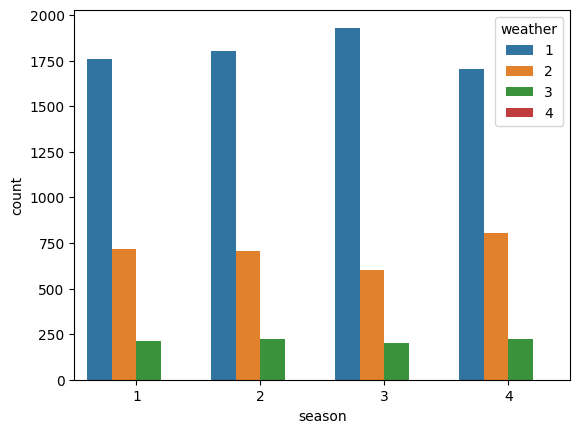

In [ ]:
sns.countplot(data = df, x = df['season'], hue = df['weather'])

In [ ]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

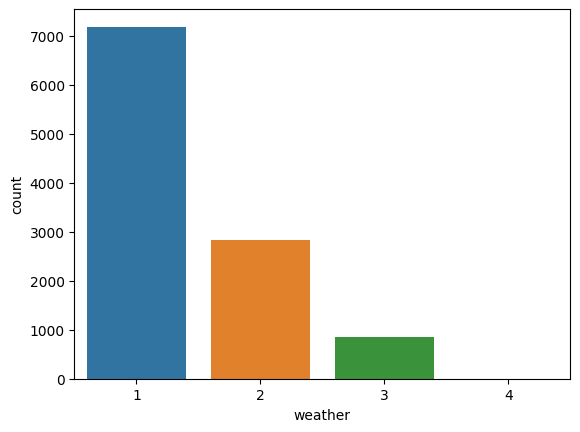

In [ ]:
sns.countplot(data = df, x = df['weather'])

<Axes: xlabel='temp', ylabel='Density'>

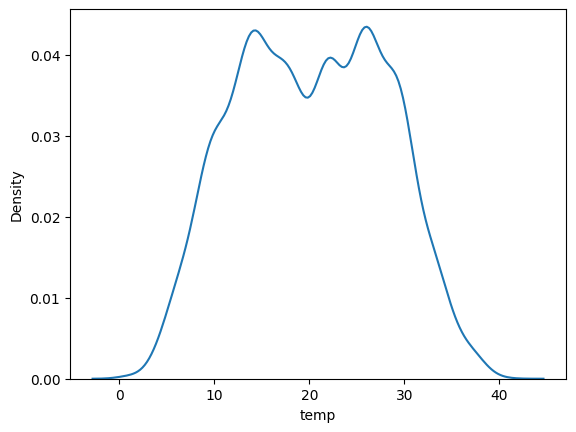

In [ ]:
sns.kdeplot(data = df, x = df['temp'])

<Axes: xlabel='atemp', ylabel='Density'>

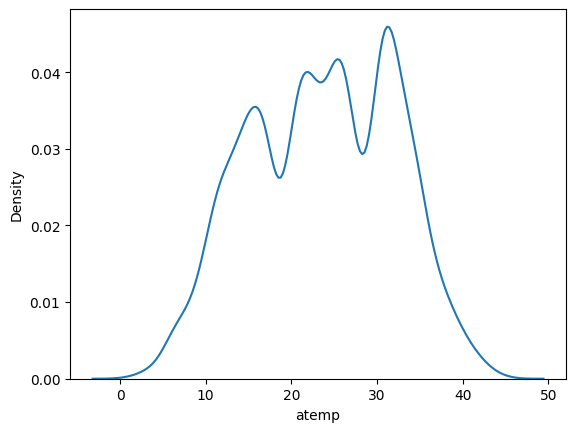

In [ ]:
sns.kdeplot(data = df, x = df['atemp'])

<Axes: xlabel='humidity', ylabel='Density'>

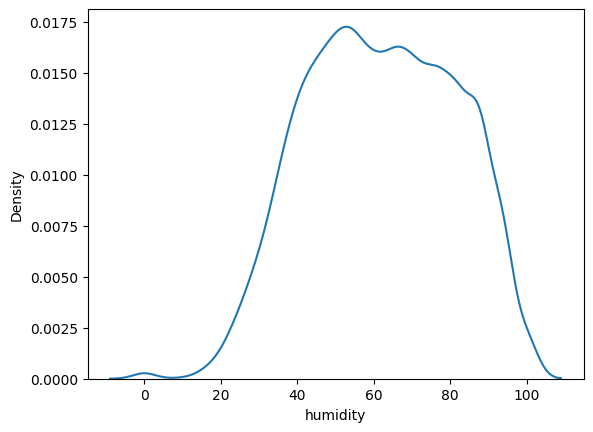

In [ ]:
sns.kdeplot(data = df, x = df['humidity'])

<Axes: xlabel='humidity'>

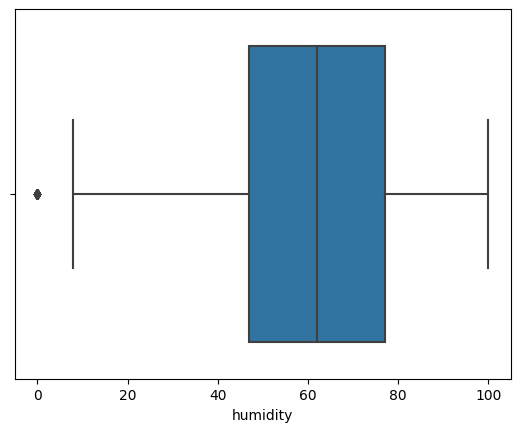

In [ ]:
sns.boxplot(data = df, x = df['humidity'])

<Axes: xlabel='windspeed'>

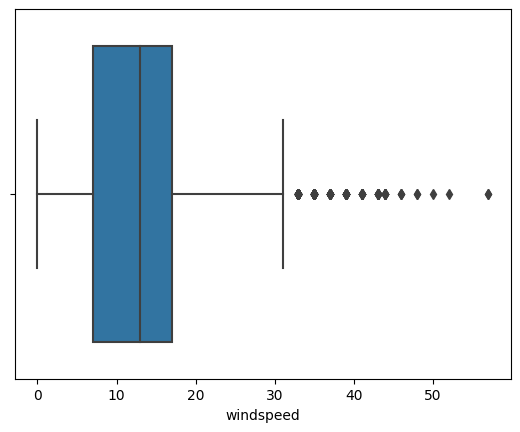

In [ ]:
sns.boxplot(data = df, x = df['windspeed'])

**Bivariate Analysis**

In [ ]:
#season vs usage counts

columns = ['count', 'casual', 'registered']
df_season = pd.DataFrame()
for col in columns:
    df_season[col] = df.groupby('season').sum(numeric_only=True)[col]
df_season = df_season.reset_index()
df_season

,season,count,casual,registered
0,1,312498,41605,270893
1,2,588282,129672,458610
2,3,640662,142718,497944
3,4,544034,78140,465894


Season wise usage has been consistent with all seasons apart from season 1 (spring)

<Axes: xlabel='season', ylabel='registered'>

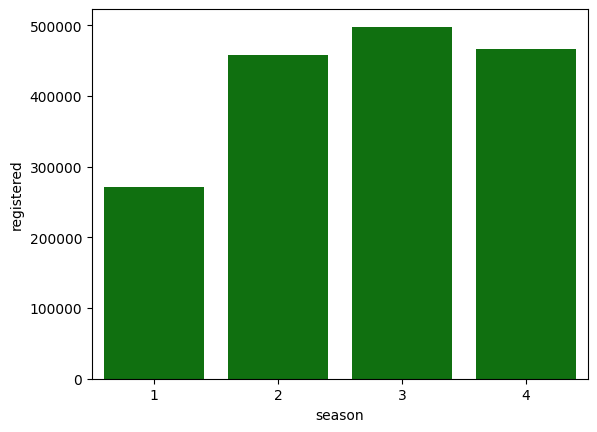

In [ ]:
sns.barplot(x='season', y='registered', data=df_season, color='green', label='Registered Count')

<Axes: xlabel='season', ylabel='casual'>

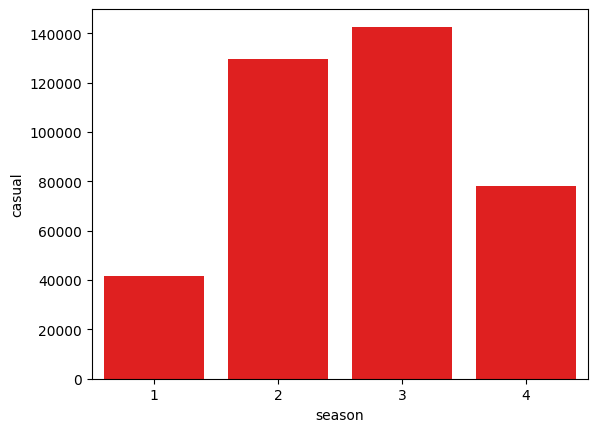

In [ ]:
sns.barplot(x='season', y='casual', data=df_season, color='red', label='Casual Count')

<Axes: xlabel='season', ylabel='count'>

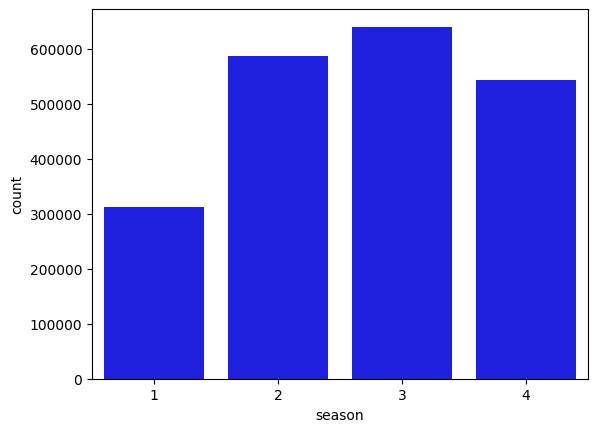

In [ ]:
sns.barplot(x='season', y='count', data=df_season, color='blue', label='Total Count')

In [ ]:
#holiday vs usage counts

columns = ['count', 'casual', 'registered']
df_season = pd.DataFrame()
for col in columns:
    df_season[col] = df.groupby('holiday').sum(numeric_only=True)[col]
df_season = df_season.reset_index()
df_season

,holiday,count,casual,registered
0,0,2027668,376964,1650704
1,1,57808,15171,42637


In [ ]:
#workingday vs usage counts

columns = ['count', 'casual', 'registered']
df_season = pd.DataFrame()
for col in columns:
    df_season[col] = df.groupby('workingday').sum(numeric_only=True)[col]
df_season = df_season.reset_index()
df_season

,workingday,count,casual,registered
0,0,654872,206037,448835
1,1,1430604,186098,1244506


In [ ]:
#weather vs usage counts

columns = ['count', 'casual', 'registered']
df_season = pd.DataFrame()
for col in columns:
    df_season[col] = df.groupby('weather').sum(numeric_only=True)[col]
df_season = df_season.reset_index()
df_season

,weather,count,casual,registered
0,1,1476063,289900,1186163
1,2,507160,87246,419914
2,3,102089,14983,87106
3,4,164,6,158


There is significant difference weather wise. Weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) has 1476063 counts where as weather 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) has only 164 count.


**Hypothesis Testing**

**2- Sample T-Test**

In [ ]:
#2- Sample T-Test to check if Working Day has an effect on the total number of electric cycles rented

Ho = 'Working Day has no effect on the total number of electric cycles rented'
Ha = 'Working Day has effect on the total number of electric cycles rented'

sample_1 = df[df['workingday'] == 0]['count'] #sample of data where day is a holiday or a weekend
sample_2 = df[df['workingday'] == 1]['count'] #sample of data where day is a working day

statistic, pvalue = ttest_ind(sample_1,sample_2)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 0.22644804226361348
test statistic: -1.2096277376026694
Fail to reject Ho
Working Day has no effect on the total number of electric cycles rented


In [ ]:
#2- Sample T-Test to check if Working Day has an effect on the CASUAL number of electric cycles rented

Ho = 'Working Day has no effect on the CASUAL number of electric cycles rented'
Ha = 'Working Day has effect on the CASUAL number of electric cycles rented'

sample_1 = df[df['workingday'] == 0]['casual'] #sample of data where day is a holiday or a weekend
sample_2 = df[df['workingday'] == 1]['casual'] #sample of data where day is a working day

statistic, pvalue = ttest_ind(sample_1,sample_2)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 3.56196742360544e-256
test statistic: 35.12830185964087
reject Ho
Working Day has effect on the CASUAL number of electric cycles rented


In [ ]:
#2- Sample T-Test to check if Working Day has an effect on the registered number of electric cycles rented

Ho = 'Working Day has no effect on the registered number of electric cycles rented'
Ha = 'Working Day has effect on the registered number of electric cycles rented'

sample_1 = df[df['workingday'] == 0]['registered'] #sample of data where day is a holiday or a weekend
sample_2 = df[df['workingday'] == 1]['registered'] #sample of data where day is a working day

statistic, pvalue = ttest_ind(sample_1,sample_2)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 6.806493719916074e-36
test statistic: -12.552707000266874
reject Ho
Working Day has effect on the registered number of electric cycles rented


As we can see from above test, there is no effect on total number of users with working day at 90% confidance interval.

However, there is effect on casual users and registered users with working day under same confidance interval





**ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season**

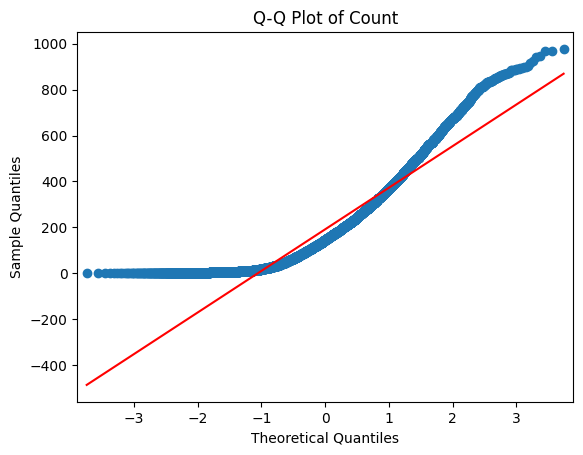

In [ ]:
#Checking assumptions for ANOVA using QQ plot

sm.qqplot(df['count'], line='s')
plt.title('Q-Q Plot of Count')
plt.show()

In [ ]:
#Levene test to check if variances are equal or not

grouped_data = [df['count'][df['season'] == season] for season in df['season'].unique()]
statistic, pvalue = levene(*grouped_data)

alpha = 0.1

print('p_value:', pvalue)
print('test statistic:', statistic)

if pvalue > alpha:
    print("Variances are equal (fail to reject H0)")
else:
    print("Variances are not equal (reject H0)")

p_value: 1.0147116860043298e-118
test statistic: 187.7706624026276
Variances are not equal (reject H0)


In [ ]:
#ANNOVA to check if TOTAL No. of cycles rented is similar or different in different season

Ho = 'total No. of cycles rented is similar in different season'
Ha = 'total No. of cycles rented is different in different season'

sample_1 = df[df['season'] == 1]['count']
sample_2 = df[df['season'] == 2]['count']
sample_3 = df[df['season'] == 3]['count']
sample_4 = df[df['season'] == 4]['count']

statistic, pvalue = f_oneway(sample_1,sample_2,sample_3,sample_4)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 6.164843386499654e-149
test statistic: 236.94671081032106
reject Ho
total No. of cycles rented is different in different season


In [ ]:
#ANNOVA to check if registered No. of cycles rented is similar or different in different season

Ho = 'registered No. of cycles rented is similar in different season'
Ha = 'registered No. of cycles rented is different in different season'

sample_1 = df[df['season'] == 1]['registered']
sample_2 = df[df['season'] == 2]['registered']
sample_3 = df[df['season'] == 3]['registered']
sample_4 = df[df['season'] == 4]['registered']

statistic, pvalue = f_oneway(sample_1,sample_2,sample_3,sample_4)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 1.8882994650328087e-106
test statistic: 167.97539126005708
reject Ho
registered No. of cycles rented is different in different season


In [ ]:
#ANNOVA to check if casual No. of cycles rented is similar or different in different season

Ho = 'casual No. of cycles rented is similar in different season'
Ha = 'casual No. of cycles rented is different in different season'

sample_1 = df[df['season'] == 1]['casual']
sample_2 = df[df['season'] == 2]['casual']
sample_3 = df[df['season'] == 3]['casual']
sample_4 = df[df['season'] == 4]['casual']

statistic, pvalue = f_oneway(sample_1,sample_2,sample_3,sample_4)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 7.937798855774506e-214
test statistic: 344.6605621917358
reject Ho
casual No. of cycles rented is different in different season


From the above test, we can conclude that there is significant difference in no. of cycles rented across all seasons at 90% confidance intervals. This is also replicated in causal and registered

In [ ]:
#ANNOVA to check if TOTAL No. of cycles rented is similar or different in different weather

Ho = 'total No. of cycles rented is similar in different weather'
Ha = 'total No. of cycles rented is different in different weather'

sample_1 = df[df['weather'] == 1]['count']
sample_2 = df[df['weather'] == 2]['count']
sample_3 = df[df['weather'] == 3]['count']
sample_4 = df[df['weather'] == 4]['count']

statistic, pvalue = f_oneway(sample_1,sample_2,sample_3,sample_4)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 5.482069475935669e-42
test statistic: 65.53024112793271
reject Ho
total No. of cycles rented is different in different weather


In [ ]:
#ANNOVA to check if registered No. of cycles rented is similar or different in different weather

Ho = 'registered No. of cycles rented is similar in different weather'
Ha = 'registered No. of cycles rented is different in different weather'

sample_1 = df[df['weather'] == 1]['registered']
sample_2 = df[df['weather'] == 2]['registered']
sample_3 = df[df['weather'] == 3]['registered']
sample_4 = df[df['weather'] == 4]['registered']

statistic, pvalue = f_oneway(sample_1,sample_2,sample_3,sample_4)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 2.0932747272621856e-31
test statistic: 48.93397612585586
reject Ho
registered No. of cycles rented is different in different weather


In [ ]:
#ANNOVA to check if casual No. of cycles rented is similar or different in different weather

Ho = 'casual No. of cycles rented is similar in different weather'
Ha = 'casual No. of cycles rented is different in different weather'

sample_1 = df[df['weather'] == 1]['casual']
sample_2 = df[df['weather'] == 2]['casual']
sample_3 = df[df['weather'] == 3]['casual']
sample_4 = df[df['weather'] == 4]['casual']

statistic, pvalue = f_oneway(sample_1,sample_2,sample_3,sample_4)
print('p_value:', pvalue)
print('test statistic:', statistic)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

p_value: 3.3100209801972467e-44
test statistic: 69.01699223934773
reject Ho
casual No. of cycles rented is different in different weather


From the above test, we can conclude that there is significant difference in no. of cycles rented across all weather's at 90% confidance intervals. This is also replicated in causal and registered

**Chi-square test to check if Weather is dependent on the season**

In [ ]:
Ho = 'Weather is independent of the season'
Ha = 'Weather is dependent of the season'


c = pd.crosstab(df['season'], df['weather'])
print(c)
chi2, pvalue,_,_ = chi2_contingency(c)
print('p_value:', pvalue)
print('chi2:', chi2)

alpha = 0.1 #90% confidance intervals
if pvalue < alpha:
  print('reject Ho')
  print(Ha)
else:
  print('Fail to reject Ho')
  print(Ho)

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0
p_value: 1.549925073686492e-07
chi2: 49.158655596893624
reject Ho
Weather is dependent of the season


From above results, we can conclude that weather is dependent of the season at 90% confidance interval.